In [1]:


import numpy as np 
import pandas as pd 



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/softwaredefectcm1/software-defects-cm1.csv


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import plotly.graph_objs as go

In [5]:

import os
print(os.listdir("../input"))

['softwaredefectcm1']


In [6]:
data = pd.read_csv('../input/softwaredefectcm1/software-defects-cm1.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                498 non-null    float64
 1   v(g)               498 non-null    float64
 2   ev(g)              498 non-null    float64
 3   iv(g)              498 non-null    float64
 4   n                  498 non-null    float64
 5   v                  498 non-null    float64
 6   l                  498 non-null    float64
 7   d                  498 non-null    float64
 8   i                  498 non-null    float64
 9   e                  498 non-null    float64
 10  b                  498 non-null    float64
 11  t                  498 non-null    float64
 12  lOCode             498 non-null    int64  
 13  lOComment          498 non-null    int64  
 14  lOBlank            498 non-null    int64  
 15  locCodeAndComment  498 non-null    int64  
 16  uniq_Op            498 non

In [8]:
data.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,1,0,6,0,15.0,15.0,44.0,19.0,9.0,0
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,0,3,0,16.0,8.0,31.0,16.0,7.0,0
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,0


In [9]:
data.tail()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
493,47.0,3.0,1.0,3.0,256.0,1563.78,0.04,28.00,55.85,43785.90,...,2,13,2,0,23.0,46.0,144.0,112.0,5.0,1
494,24.0,4.0,3.0,3.0,107.0,587.63,0.05,19.13,30.72,11241.58,...,1,7,4,0,22.0,23.0,67.0,40.0,7.0,1
495,82.0,11.0,3.0,10.0,475.0,3155.83,0.02,44.71,70.59,141084.24,...,9,59,35,0,32.0,68.0,285.0,190.0,21.0,1
496,10.0,2.0,1.0,1.0,32.0,150.41,0.15,6.50,23.14,977.69,...,1,12,4,0,13.0,13.0,19.0,13.0,3.0,1
497,28.0,6.0,5.0,5.0,104.0,564.33,0.06,16.09,35.08,9078.38,...,2,7,0,0,20.0,23.0,67.0,37.0,11.0,1


In [10]:
data.sample(10)

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
414,21.0,4.0,4.0,4.0,96.0,492.41,0.10,10.50,46.90,5170.32,...,3,7,7,0,15.0,20.0,68.0,28.0,7.0,0
396,6.0,2.0,1.0,2.0,27.0,112.59,0.16,6.29,17.91,707.70,...,2,6,4,0,11.0,7.0,19.0,8.0,3.0,0
119,125.0,18.0,1.0,13.0,438.0,3131.59,0.02,40.25,77.80,126046.47,...,13,50,21,0,46.0,96.0,270.0,168.0,31.0,0
53,41.0,6.0,1.0,5.0,169.0,985.76,0.06,17.21,57.28,16963.26,...,3,47,40,0,21.0,36.0,110.0,59.0,11.0,0
287,17.0,5.0,4.0,2.0,120.0,620.39,0.04,23.47,26.43,14560.94,...,1,10,4,0,19.0,17.0,78.0,42.0,9.0,0
454,33.0,6.0,1.0,5.0,172.0,989.84,0.05,18.46,53.63,18269.63,...,7,30,31,0,19.0,35.0,104.0,68.0,11.0,1
256,52.0,10.0,3.0,6.0,342.0,2220.21,0.02,46.67,47.58,103609.98,...,12,25,31,0,36.0,54.0,202.0,140.0,19.0,0
104,34.0,6.0,1.0,6.0,146.0,771.67,0.08,12.00,64.31,9260.02,...,4,0,10,0,12.0,27.0,92.0,54.0,11.0,0
324,15.0,2.0,1.0,1.0,42.0,178.41,0.10,9.63,18.54,1717.22,...,0,0,3,0,11.0,8.0,28.0,14.0,3.0,0
55,8.0,2.0,1.0,1.0,36.0,158.12,0.18,5.50,28.75,869.68,...,0,6,7,0,11.0,10.0,26.0,10.0,3.0,0


In [11]:
data.shape

(498, 22)

In [12]:
data.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,4.980000e+02,...,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,29.644779,5.382329,2.490763,3.528916,143.956426,900.175823,0.146325,15.829378,38.455361,3.488493e+04,...,3.787149,12.283133,11.534137,0.006024,15.199197,25.452209,88.389960,55.570683,9.348193,0.098394
std,42.753572,8.347359,3.658847,5.464398,221.049888,1690.814334,0.159337,15.330960,36.996297,1.341647e+05,...,8.508658,25.828605,19.981476,0.100120,9.617815,33.925816,134.917513,86.969527,15.072219,0.298146
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,8.000000,1.000000,1.000000,1.000000,25.000000,102.190000,0.050000,5.630000,16.210000,6.061700e+02,...,0.000000,0.000000,1.000000,0.000000,9.000000,7.000000,15.000000,10.000000,1.000000,0.000000
50%,17.000000,3.000000,1.000000,2.000000,67.500000,329.820000,0.090000,11.640000,27.400000,3.677620e+03,...,1.000000,4.000000,5.000000,0.000000,14.000000,15.000000,42.000000,26.000000,5.000000,0.000000
75%,31.000000,6.000000,1.000000,4.000000,151.750000,861.460000,0.177500,21.142500,46.900000,1.663334e+04,...,4.000000,14.000000,13.000000,0.000000,20.000000,30.000000,94.750000,59.750000,11.000000,0.000000
max,423.000000,96.000000,30.000000,63.000000,2075.000000,17124.280000,1.300000,125.770000,293.680000,2.153691e+06,...,80.000000,339.000000,164.000000,2.000000,72.000000,314.000000,1261.000000,814.000000,162.000000,1.000000


In [13]:
defects_true_false = data.groupby('defects')['b'].apply(lambda x: x.count()) #defect rates (true/false)
print('False : ' , defects_true_false[0])
print('True : ' , defects_true_false[1])

False :  449
True :  49


In [14]:
trace = go.Histogram(
    x = data.defects,
    opacity = 0.75,
    name = "Defects",
    marker = dict(color = 'green'))

hist_data = [trace]
hist_layout = go.Layout(barmode='overlay',
                   title = 'Defects',
                   xaxis = dict(title = 'True - False'),
                   yaxis = dict(title = 'Frequency'),
)
fig = go.Figure(data = hist_data, layout = hist_layout)
iplot(fig)

In [15]:
data.corr()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
loc,1.000000,0.942908,0.773607,0.919270,0.940466,0.952699,-0.357998,0.728502,0.797565,0.814611,...,0.679721,0.862704,0.679942,-0.040300,0.803036,0.943241,0.941778,0.929347,0.940823,0.246467
v(g),0.942908,1.000000,0.806544,0.929741,0.907581,0.919714,-0.342571,0.773446,0.668793,0.856458,...,0.733292,0.795747,0.666712,-0.029726,0.801255,0.860150,0.910242,0.894691,0.991826,0.166761
ev(g),0.773607,0.806544,1.000000,0.714994,0.770008,0.773645,-0.280011,0.675765,0.554699,0.685490,...,0.605862,0.682972,0.568783,-0.020170,0.649567,0.710749,0.775750,0.753672,0.829226,0.105047
iv(g),0.919270,0.929741,0.714994,1.000000,0.870063,0.889894,-0.300078,0.679901,0.696397,0.826191,...,0.674501,0.739883,0.647548,-0.024960,0.755188,0.857157,0.873645,0.856111,0.911202,0.202645
n,0.940466,0.907581,0.770008,0.870063,1.000000,0.993306,-0.397294,0.841433,0.810141,0.844168,...,0.727183,0.794619,0.731518,-0.038936,0.837047,0.947383,0.997563,0.994124,0.912958,0.214049
v,0.952699,0.919714,0.773645,0.889894,0.993306,1.000000,-0.346625,0.797672,0.792191,0.876855,...,0.731986,0.813944,0.721394,-0.032055,0.808148,0.948709,0.990824,0.987568,0.920633,0.206623
l,-0.357998,-0.342571,-0.280011,-0.300078,-0.397294,-0.346625,1.000000,-0.540916,-0.404108,-0.196933,...,-0.266412,-0.289062,-0.331775,0.398689,-0.629990,-0.402986,-0.397856,-0.392290,-0.358672,-0.132567
d,0.728502,0.773446,0.675765,0.679901,0.841433,0.797672,-0.540916,1.000000,0.514898,0.717773,...,0.614364,0.614590,0.642382,-0.057531,0.884115,0.697731,0.840947,0.834040,0.773032,0.168173
i,0.797565,0.668793,0.554699,0.696397,0.810141,0.792191,-0.404108,0.514898,1.000000,0.468739,...,0.511707,0.645486,0.580700,-0.060712,0.649853,0.914101,0.809787,0.802842,0.699037,0.267764
e,0.814611,0.856458,0.685490,0.826191,0.844168,0.876855,-0.196933,0.717773,0.468739,1.000000,...,0.664990,0.683293,0.591581,-0.015676,0.656657,0.715288,0.842162,0.839142,0.825467,0.097784


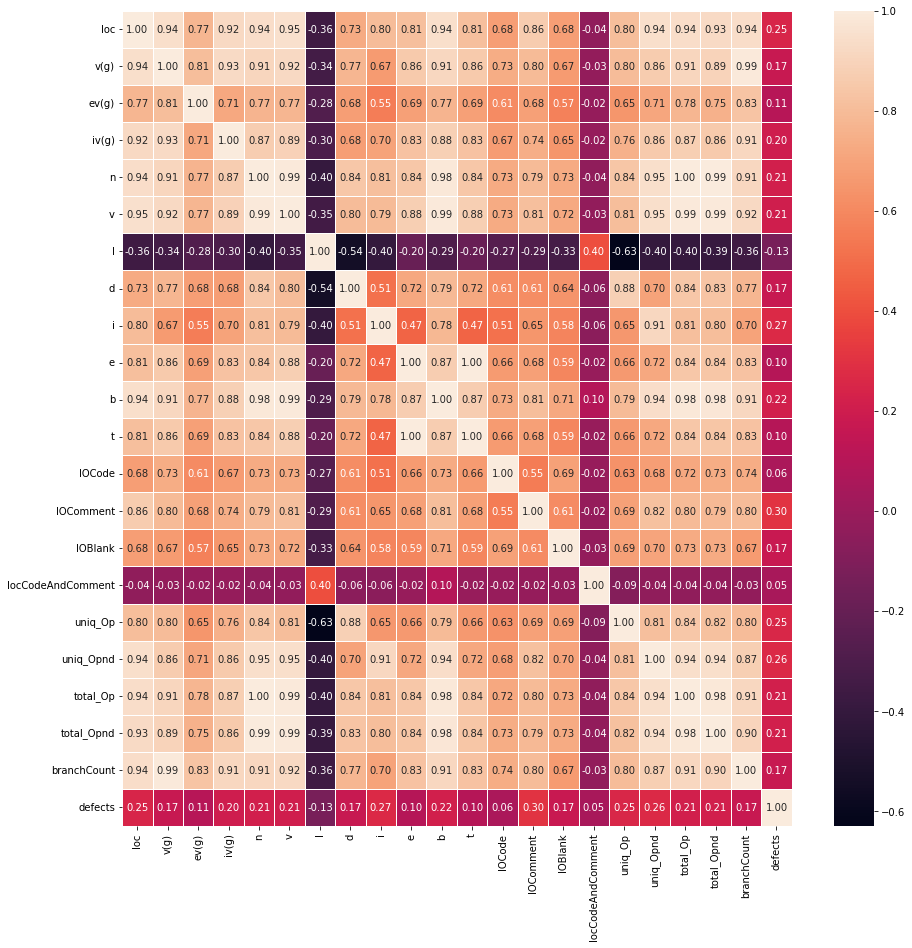

In [16]:
f,ax = plt.subplots(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.show()

In [17]:
    trace = go.Scatter(x = data.v,
    y = data.b,
    mode = "markers",
    name = "Volume - Bug",
    marker = dict(color = 'darkblue'),
    text = "Bug (b)")

scatter_data = [trace]
scatter_layout = dict(title = 'Volume - Bug',
              xaxis = dict(title = 'Volume', ticklen = 5),
              yaxis = dict(title = 'Bug' , ticklen = 5),
             )
fig = dict(data = scatter_data, layout = scatter_layout)
iplot(fig)

In [18]:
data.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [19]:
trace1 = go.Box(
    x = data.uniq_Op,
    name = 'Unique Operators',
    marker = dict(color = 'blue')
    )
box_data = [trace1]
iplot(box_data)


In [20]:
def evaluation_control(data):    
    evaluation = (data.n < 300) & (data.v < 1000 ) & (data.d < 50) & (data.e < 500000) & (data.t < 5000)
    data['complexityEvaluation'] = pd.DataFrame(evaluation)
    data['complexityEvaluation'] = ['Succesful' if evaluation == True else 'Redesign' for evaluation in data.complexityEvaluation]

In [21]:
evaluation_control(data)
data


,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,complexityEvaluation
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,1.2,1.2,1.2,1.2,1.4,0,Succesful
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1.0,1.0,1.0,1.0,1.0,1,Succesful
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,0,6,0,15.0,15.0,44.0,19.0,9.0,0,Succesful
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,3,0,16.0,8.0,31.0,16.0,7.0,0,Succesful
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,3,0,16.0,12.0,46.0,26.0,11.0,0,Succesful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,47.0,3.0,1.0,3.0,256.0,1563.78,0.04,28.00,55.85,43785.90,...,13,2,0,23.0,46.0,144.0,112.0,5.0,1,Redesign
494,24.0,4.0,3.0,3.0,107.0,587.63,0.05,19.13,30.72,11241.58,...,7,4,0,22.0,23.0,67.0,40.0,7.0,1,Succesful
495,82.0,11.0,3.0,10.0,475.0,3155.83,0.02,44.71,70.59,141084.24,...,59,35,0,32.0,68.0,285.0,190.0,21.0,1,Redesign
496,10.0,2.0,1.0,1.0,32.0,150.41,0.15,6.50,23.14,977.69,...,12,4,0,13.0,13.0,19.0,13.0,3.0,1,Succesful


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loc                   498 non-null    float64
 1   v(g)                  498 non-null    float64
 2   ev(g)                 498 non-null    float64
 3   iv(g)                 498 non-null    float64
 4   n                     498 non-null    float64
 5   v                     498 non-null    float64
 6   l                     498 non-null    float64
 7   d                     498 non-null    float64
 8   i                     498 non-null    float64
 9   e                     498 non-null    float64
 10  b                     498 non-null    float64
 11  t                     498 non-null    float64
 12  lOCode                498 non-null    int64  
 13  lOComment             498 non-null    int64  
 14  lOBlank               498 non-null    int64  
 15  locCodeAndComment     4

In [23]:
data.groupby("complexityEvaluation").size()

complexityEvaluation
Redesign     112
Succesful    386
dtype: int64

In [24]:
trace = go.Histogram(
    x = data.complexityEvaluation,
    opacity = 0.75,
    name = 'Complexity Evaluation',
    marker = dict(color = 'pink')
)
hist_data = [trace]
hist_layout = go.Layout(barmode='overlay',
                   title = 'Complexity Evaluation',
                   xaxis = dict(title = 'Succesful - Redesign'),
                   yaxis = dict(title = 'Frequency')
)
fig = go.Figure(data = hist_data, layout = hist_layout)
iplot(fig)

In [25]:
from sklearn import preprocessing

scale_v = data[['v']]
scale_b = data[['b']]

minmax_scaler = preprocessing.MinMaxScaler()

v_scaled = minmax_scaler.fit_transform(scale_v)
b_scaled = minmax_scaler.fit_transform(scale_b)

data['v_ScaledUp'] = pd.DataFrame(v_scaled)
data['b_ScaledUp'] = pd.DataFrame(b_scaled)

data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,complexityEvaluation,v_ScaledUp,b_ScaledUp
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,1.2,1.2,1.2,1.2,1.4,0,Succesful,0.000076,0.227671
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1.0,1.0,1.0,1.0,1.0,1,Succesful,0.000058,0.175131
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,0,15.0,15.0,44.0,19.0,9.0,0,Succesful,0.018052,0.017513
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,16.0,8.0,31.0,16.0,7.0,0,Succesful,0.012584,0.012259
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,16.0,12.0,46.0,26.0,11.0,0,Succesful,0.020213,0.021016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,47.0,3.0,1.0,3.0,256.0,1563.78,0.04,28.00,55.85,43785.90,...,0,23.0,46.0,144.0,112.0,5.0,1,Redesign,0.091319,0.091068
494,24.0,4.0,3.0,3.0,107.0,587.63,0.05,19.13,30.72,11241.58,...,0,22.0,23.0,67.0,40.0,7.0,1,Succesful,0.034316,0.035026
495,82.0,11.0,3.0,10.0,475.0,3155.83,0.02,44.71,70.59,141084.24,...,0,32.0,68.0,285.0,190.0,21.0,1,Redesign,0.184290,0.183888
496,10.0,2.0,1.0,1.0,32.0,150.41,0.15,6.50,23.14,977.69,...,0,13.0,13.0,19.0,13.0,3.0,1,Succesful,0.008783,0.008757


In [26]:
scaled_data = pd.concat([data.v , data.b , data.v_ScaledUp , data.b_ScaledUp], axis=1)
scaled_data

,v,b,v_ScaledUp,b_ScaledUp
0,1.30,1.30,0.000076,0.227671
1,1.00,1.00,0.000058,0.175131
2,309.13,0.10,0.018052,0.017513
3,215.49,0.07,0.012584,0.012259
4,346.13,0.12,0.020213,0.021016
...,...,...,...,...
493,1563.78,0.52,0.091319,0.091068
494,587.63,0.20,0.034316,0.035026
495,3155.83,1.05,0.184290,0.183888
496,150.41,0.05,0.008783,0.008757


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loc                   498 non-null    float64
 1   v(g)                  498 non-null    float64
 2   ev(g)                 498 non-null    float64
 3   iv(g)                 498 non-null    float64
 4   n                     498 non-null    float64
 5   v                     498 non-null    float64
 6   l                     498 non-null    float64
 7   d                     498 non-null    float64
 8   i                     498 non-null    float64
 9   e                     498 non-null    float64
 10  b                     498 non-null    float64
 11  t                     498 non-null    float64
 12  lOCode                498 non-null    int64  
 13  lOComment             498 non-null    int64  
 14  lOBlank               498 non-null    int64  
 15  locCodeAndComment     4

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import model_selection
X = data.iloc[:, :-10].values
Y = data.complexityEvaluation.values

In [29]:
Y

array(['Succesful', 'Succesful', 'Succesful', 'Succesful', 'Succesful',
       'Succesful', 'Succesful', 'Succesful', 'Succesful', 'Redesign',
       'Succesful', 'Succesful', 'Succesful', 'Succesful', 'Redesign',
       'Succesful', 'Succesful', 'Succesful', 'Succesful', 'Succesful',
       'Succesful', 'Succesful', 'Succesful', 'Succesful', 'Succesful',
       'Succesful', 'Succesful', 'Succesful', 'Redesign', 'Redesign',
       'Succesful', 'Redesign', 'Redesign', 'Redesign', 'Succesful',
       'Succesful', 'Succesful', 'Succesful', 'Succesful', 'Succesful',
       'Succesful', 'Succesful', 'Succesful', 'Redesign', 'Redesign',
       'Redesign', 'Succesful', 'Succesful', 'Succesful', 'Redesign',
       'Redesign', 'Succesful', 'Redesign', 'Succesful', 'Succesful',
       'Succesful', 'Succesful', 'Succesful', 'Succesful', 'Redesign',
       'Succesful', 'Succesful', 'Succesful', 'Succesful', 'Succesful',
       'Succesful', 'Succesful', 'Redesign', 'Succesful', 'Succesful',
       

In [30]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [31]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [32]:
scoring = 'accuracy'
kfold = model_selection.KFold(n_splits = 10)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv = kfold, scoring = scoring)

In [33]:
cv_results

array([0.95      , 0.95      , 0.95      , 0.975     , 0.95      ,
       1.        , 0.95      , 0.975     , 0.94871795, 0.97435897])

In [34]:
msg = "Mean : %f - Std : (%f)" % (cv_results.mean(), cv_results.std())
msg

'Mean : 0.962308 - Std : (0.016823)'

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

    Redesign       0.95      0.98      0.97        43
   Succesful       0.99      0.99      0.99       157

    accuracy                           0.98       200
   macro avg       0.97      0.98      0.98       200
weighted avg       0.99      0.98      0.99       200

[[ 42   1]
 [  2 155]]
ACC:  0.985


In [36]:
 sel_loc = data['loc']
 sel_b = data["b"]
 selected_data = pd.concat([sel_loc, sel_b], axis=1)
 selected_data

,loc,b
0,1.1,1.30
1,1.0,1.00
2,24.0,0.10
3,20.0,0.07
4,24.0,0.12
...,...,...
493,47.0,0.52
494,24.0,0.20
495,82.0,1.05
496,10.0,0.05


In [37]:
selected_data.describe()


,loc,b
count,498.000000,498.000000
mean,29.644779,0.304699
std,42.753572,0.565998
min,1.000000,0.000000
25%,8.000000,0.030000
50%,17.000000,0.110000
75%,31.000000,0.300000
max,423.000000,5.710000


In [38]:
selected_data.corr()

,loc,b
loc,1.000000,0.943339
b,0.943339,1.000000


In [39]:
#Scatter Plot
trace = go.Scatter(
    x = data['loc'],
    y = data.b,
    mode = "markers",
    name = "Line of Code - Bug",
    marker = dict(color = 'darkmagenta'),
    text = "Bug (b)")

scatter_data = [trace]
scatter_layout = dict(title = 'Line of Code - Bug',
              xaxis = dict(title = 'Line of Code', ticklen = 5),
              yaxis = dict(title = 'Bug' , ticklen = 5),
             )
fig = dict(data = scatter_data, layout = scatter_layout)
iplot(fig)

In [40]:
Y = selected_data['b'].values  
X = selected_data['loc'].values  
X = X.reshape(-1,1)
#Select the X and Y values for selection
Y

array([1.3 , 1.  , 0.1 , 0.07, 0.12, 0.12, 0.01, 0.03, 0.18, 0.45, 0.29,
       0.05, 0.26, 0.16, 0.43, 0.22, 0.09, 0.02, 0.25, 0.02, 0.04, 0.02,
       0.04, 0.06, 0.07, 0.01, 0.01, 0.12, 1.11, 1.86, 0.06, 5.12, 0.65,
       0.88, 0.12, 0.18, 0.09, 0.1 , 0.23, 0.23, 0.13, 0.24, 0.21, 0.36,
       0.67, 0.55, 0.06, 0.14, 0.01, 0.54, 1.78, 0.13, 0.43, 0.33, 0.08,
       0.05, 0.16, 0.01, 0.18, 0.35, 0.27, 0.1 , 0.1 , 0.03, 0.02, 0.19,
       0.15, 0.44, 0.31, 0.17, 1.04, 0.3 , 0.09, 0.72, 0.04, 0.12, 0.05,
       0.06, 0.06, 0.17, 0.2 , 0.01, 0.16, 0.01, 0.04, 0.06, 0.05, 0.01,
       0.17, 0.03, 0.12, 0.02, 0.03, 0.25, 0.01, 0.21, 0.01, 0.01, 0.01,
       0.1 , 0.1 , 0.1 , 1.7 , 0.21, 0.26, 0.43, 0.08, 0.08, 0.38, 0.02,
       0.01, 0.01, 0.9 , 1.89, 0.18, 0.1 , 0.09, 0.1 , 1.71, 1.04, 0.03,
       1.57, 0.04, 0.12, 0.15, 0.28, 1.15, 0.66, 0.01, 0.01, 0.3 , 0.01,
       0.03, 0.03, 0.03, 0.49, 0.28, 0.01, 0.1 , 1.86, 0.01, 0.12, 0.06,
       0.1 , 0.01, 0.05, 0.05, 0.25, 0.1 , 0.18, 0.

In [41]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [42]:
#Creation of Linear Regression model
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train)  

LinearRegression()

In [43]:
print("Intercept :", model.intercept_)  
print("Coef :", model.coef_)

Intercept : -0.07757248320437915
Coef : [0.01296645]


In [44]:
X_test

array([[ 14.],
       [ 29.],
       [ 49.],
       [  3.],
       [ 12.],
       [ 24.],
       [  8.],
       [ 18.],
       [  6.],
       [  6.],
       [172.],
       [  6.],
       [ 29.],
       [ 20.],
       [ 16.],
       [ 44.],
       [411.],
       [ 25.],
       [  9.],
       [ 13.],
       [ 15.],
       [ 61.],
       [ 98.],
       [ 26.],
       [ 65.],
       [ 14.],
       [  3.],
       [ 63.],
       [  8.],
       [ 11.],
       [  9.],
       [154.],
       [ 20.],
       [  5.],
       [ 75.],
       [ 49.],
       [ 21.],
       [  4.],
       [ 20.],
       [  9.],
       [  7.],
       [  8.],
       [  9.],
       [ 14.],
       [ 12.],
       [  1.],
       [ 22.],
       [121.],
       [ 13.],
       [130.],
       [165.],
       [ 32.],
       [  3.],
       [  6.],
       [ 12.],
       [ 23.],
       [  6.],
       [  6.],
       [  3.],
       [  9.],
       [ 16.],
       [106.],
       [ 15.],
       [ 29.],
       [ 10.],
       [  7.],
       [ 3

In [45]:
y_pred = model.predict(X_test) 

In [46]:
# New data (real , estimated)
new_data = pd.DataFrame({'real': y_test, 'estimated': y_pred})  
new_data

,real,estimated
0,0.12,0.103958
1,0.30,0.298455
2,0.77,0.557784
3,0.02,-0.038673
4,0.18,0.078025
...,...,...
145,0.12,0.233622
146,0.09,0.168790
147,0.10,0.116924
148,0.16,0.194723


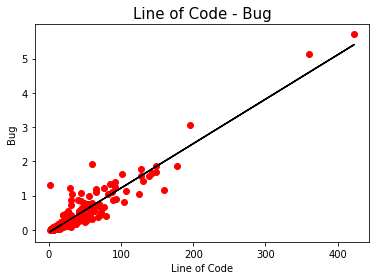

In [47]:
#The nearest line of all values in the model
plt.scatter(X_train, y_train, color = 'red')
modelin_tahmin_ettigi_y = model.predict(X_train)
plt.plot(X_train, modelin_tahmin_ettigi_y, color = 'black')
plt.title('Line of Code - Bug', size = 15)  
plt.xlabel('Line of Code')  
plt.ylabel('Bug')  
plt.show()

In [48]:
from sklearn import metrics   
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error (MSE): 0.03730825148999717
Root Mean Squared Error (RMSE): 0.19315344027481665
